In [1]:
#Powtórz to wszystko co dziś robiliśmy dla zbioru Iris. 
#Na końcu wyświelt wykres 3D
#Ile jest klas w zbiorze, a na ile klastrów powinno podzielić się zbiór wg wyznaczonych miar?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('Iris.csv')

In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df = df.drop(['Id', 'Species'], axis =1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


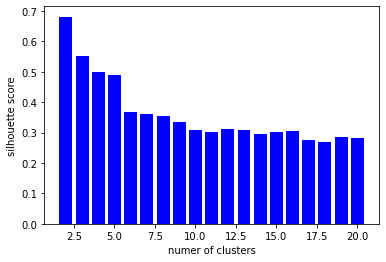

In [11]:
def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return silhouette_score(data, model.labels_, metric='euclidean')

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()

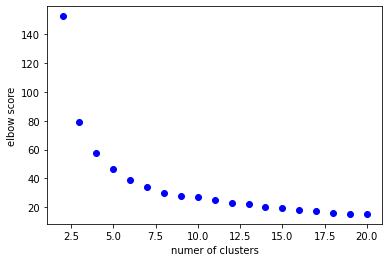

In [12]:
def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return abs(model.score(data))

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.plot(k_list, results,'o', color='b')
plt.xlabel('numer of clusters')
plt.ylabel('elbow score')
plt.show()

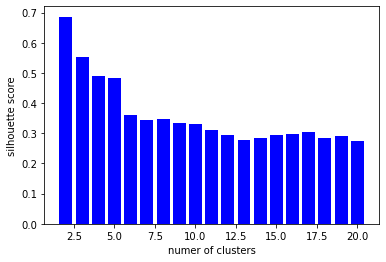

In [13]:
def get_agglomerative_clustering(data, k):
    agg_cluster = AgglomerativeClustering(n_clusters=k)
    model = agg_cluster.fit(data)
    return silhouette_score(data, model.labels_, metric='euclidean')

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_agglomerative_clustering(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()

Text(0.5, 0, 'PetalLengthCm')

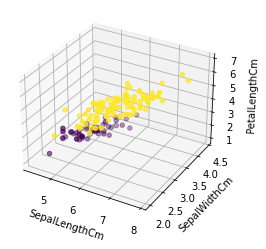

In [14]:
kmeans = KMeans(n_clusters=2) 
model = kmeans.fit(df) 
labels = model.predict(df) 

#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"],c=labels)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

Text(0.5, 0, 'PetalLengthCm')

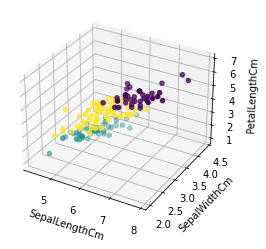

In [15]:
kmeans = KMeans(n_clusters=3) 
model = kmeans.fit(df) 
labels = model.predict(df) 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"],c=labels)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

Text(0.5, 0, 'PetalLengthCm')

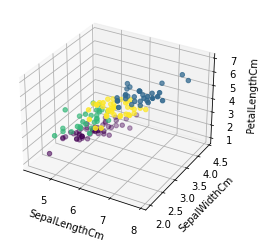

In [16]:
kmeans = KMeans(n_clusters=4) 
model = kmeans.fit(df) 
labels = model.predict(df) 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"],c=labels)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

klasyfikacja nie ma zawsze przełożenia na klasteryzację - klasyfikacja w przypadku tego zbioru ma 100% skuteczności, a przy klastrowaniu algorytm pokazuje nam, że najlepiej będzie jednak podzielić dane na 2 grupy 